In [1]:
from evaldata_utils import parse_model_path, load_data
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
metrics = [
    "mmlu/acc",
    "mmlu_pro/exact_match,custom-extract",
    "copa/acc",
    "lambada_openai/acc",
    "openbookqa/acc",
    "openbookqa/acc_norm",
    "winogrande/acc",
    "arc_challenge/acc_norm",
    "arc_challenge/acc",
    "arc_easy/acc_norm",
    "arc_easy/acc",
    "boolq/acc",
    "commonsense_qa/acc",
    "hellaswag/acc_norm",
    "piqa/acc_norm",
    "piqa/acc",
    "social_iqa/acc",
]


In [3]:
benchmarks = ['copa', 'lambada_openai', 'openbookqa', 'winogrande', 'social_iqa',
       'mmlu', 'mmlu_pro', 'arc_challenge', 'arc_easy', 'boolq',
       'commonsense_qa', 'hellaswag', 'piqa']

In [4]:
df_all = pd.read_csv("results.csv.zip")

In [5]:

print(f"Number of models: {len(df_all.model_name.unique())}, numbers of checkpoints: {len(df_all.model_path.unique())}")

Number of models: 42, numbers of checkpoints: 1202


In [6]:
df_all.pivot_table(index="model_name", columns="benchmark", aggfunc="count")["context"]

benchmark,arc_challenge,arc_easy,boolq,commonsense_qa,copa,hellaswag,lambada_openai,mmlu,mmlu_pro,openbookqa,piqa,social_iqa,winogrande
model_name,,,,,,,,,,,,,
open-sci-ref_model-0.13b_data-Nemotron-cc-2024-HQ-real-synth-mix_tokenizer-GPT-NeoX_samples-300B_global_bs-1008_context-4096_schedule-WSD_lr-4e-3_warmup-25000_machine-LEONARDO,74.0,74.0,37.0,37.0,37.0,37.0,37.0,37.0,NaN,74.0,74.0,37.0,37.0
open-sci-ref_model-1.7b_data-C4_tokenizer-GPT-NeoX_samples-50B_global_bs-2048_context-2048_schedule-WSD_lr-4e-3_warmup-1000_disable-bias_no-softmax-fusion_machine-LEONARDO,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,2.0,2.0,1.0,1.0
open-sci-ref_model-1.7b_data-C4_tokenizer-GPT-NeoX_samples-50B_global_bs-2048_context-2048_schedule-WSD_lr-4e-3_warmup-1000_untie-embbed_disable-bias_no-softmax-fusion_machine-LEONARDO,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,2.0,2.0,1.0,1.0
open-sci-ref_model-1.7b_data-C4_tokenizer-GPT-NeoX_samples-50B_global_bs-2048_context-2048_schedule-WSD_lr-4e-3_warmup-1000_untie-embbed_no-softmax-fusion_machine-LEONARDO,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,2.0,2.0,1.0,1.0
open-sci-ref_model-1.7b_data-Nemotron-cc-2024-HQ-real-synth-mix_tokenizer-GPT-NeoX_samples-1000B_global_bs-1008_context-4096_schedule-WSD_lr-4e-3_warmup-25000_machine-LEONARDO,174.0,166.0,83.0,87.0,87.0,83.0,87.0,87.0,NaN,174.0,174.0,87.0,87.0
open-sci-ref_model-1.7b_data-Nemotron-cc-2024-HQ-real-synth-mix_tokenizer-GPT-NeoX_samples-300B_global_bs-1008_context-4096_schedule-WSD_lr-4e-3_warmup-25000_machine-LEONARDO,74.0,74.0,37.0,37.0,37.0,37.0,37.0,37.0,NaN,74.0,74.0,37.0,37.0
open-sci-refmodel-0.13bdata-DCLMtokenizer-GPT-NeoX-2samples-300Bglobalbs-1008context-4096schedule-WSDlr-6e-3warmup-25000machine-LEONARDO,74.0,74.0,37.0,37.0,37.0,37.0,37.0,62.0,56.0,74.0,74.0,37.0,37.0
open-sci-refmodel-0.13bdata-DCLMtokenizer-GPT-NeoXsamples-300Bglobalbs-1008context-4096schedule-WSDlr-4e-3warmup-25000machine-LEONARDO,74.0,74.0,37.0,37.0,37.0,37.0,37.0,37.0,31.0,74.0,74.0,37.0,37.0
open-sci-refmodel-0.13bdata-FineWeb-Edu-1.4Ttokenizer-GPT-NeoXsamples-300Bglobalbs-1008context-4096schedule-WSDlr-4e-3warmup-25000machine-LEONARDO,74.0,74.0,37.0,37.0,37.0,37.0,37.0,62.0,56.0,74.0,74.0,37.0,37.0


## Scores analysis

In [7]:
bench_sel = ['mmlu', 'copa', 'lambada_openai', 'openbookqa', 'winogrande', 'arc_challenge', 'boolq', 'commonsense_qa', 'hellaswag', 'piqa']

In [8]:
df_scores = df_all.pivot_table(index="model_path", columns="benchmark", aggfunc="max")["value"].loc[:, bench_sel]

In [9]:
df_scores.dropna().mean(axis=1).sort_values(ascending=False)

model_path
/leonardo_work/EUHPC_E03_068/tcarsten/converted_checkpoints/open-sci-ref_model-1.7b_data-Nemotron-cc-2024-HQ-real-synth-mix_tokenizer-GPT-NeoX_samples-1000B_global_bs-1008_context-4096_schedule-WSD_lr-4e-3_warmup-25000_machine-LEONARDO_13977373/hf/iter_0242000    0.629294
/leonardo_work/EUHPC_E03_068/tcarsten/converted_checkpoints/open-sci-ref_model-1.7b_data-Nemotron-cc-2024-HQ-real-synth-mix_tokenizer-GPT-NeoX_samples-1000B_global_bs-1008_context-4096_schedule-WSD_lr-4e-3_warmup-25000_machine-LEONARDO_13942024/hf/iter_0242000    0.629294
/leonardo_work/EUHPC_E03_068/tcarsten/converted_checkpoints/open-sci-ref_model-1.7b_data-Nemotron-cc-2024-HQ-real-synth-mix_tokenizer-GPT-NeoX_samples-1000B_global_bs-1008_context-4096_schedule-WSD_lr-4e-3_warmup-25000_machine-LEONARDO_13942024/hf/iter_0242204    0.628593
/leonardo_work/EUHPC_E03_068/tcarsten/converted_checkpoints/open-sci-ref_model-1.7b_data-Nemotron-cc-2024-HQ-real-synth-mix_tokenizer-GPT-NeoX_samples-1000B_global_bs-100

In [10]:
model_name = "open-sci-ref_model-1.7b_data-C4_tokenizer-GPT-NeoX_samples-300B_global_bs-2048_context-2048_schedule-WSD_lr-4e-3_warmup-30000_machine-LEONARDO_11580700"
df_all[df_all.model_path.str.contains(model_name)].pivot_table(
    index="n_iter", 
    columns="n_tokens", 
    values="value",
).head()

n_tokens,300
n_iter,
2000,0.377479
4000,0.422131
6000,0.423536
8000,0.444826
10000,0.458112


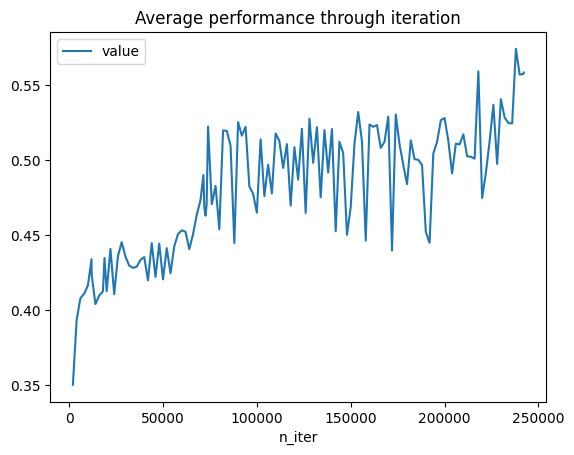

In [11]:
df_mean = df_all.loc[:, ["model_path", "n_iter", "value"]].groupby(["model_path", "n_iter"]).mean().reset_index()
df_mean = df_mean.sort_values(by=["model_path", "n_iter"])
ax = df_mean.loc[:, ["n_iter", "value"]].groupby("n_iter").mean().plot()
ax.set_title("Average performance through iteration");

Text(0, 0.5, 'Average performance')

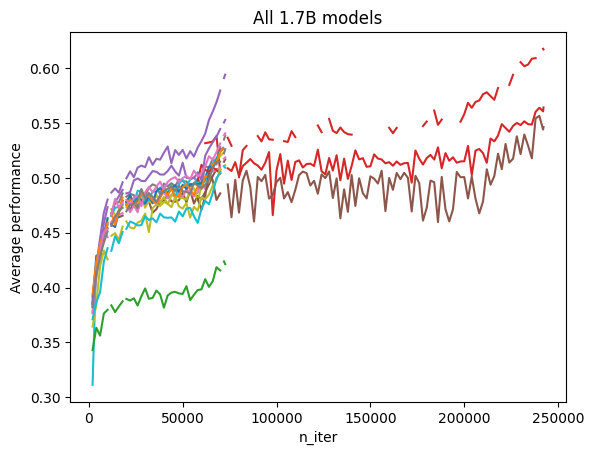

In [12]:
bench_sel_curve = [
    #'mmlu',
 'copa',
 'lambada_openai',
 'openbookqa',
 'winogrande',
 'arc_challenge',
 'boolq',
 'commonsense_qa',
 'hellaswag',
 'piqa']


df_all.loc[(df_all.benchmark.isin(bench_sel_curve)) & (df_all.loc[:, "size"] == 1.7)].pivot_table(index="n_iter", columns="model_name", values="value").plot(legend=False)
plt.title("All 1.7B models")
plt.ylabel("Average performance")

Text(0, 0.5, 'Average performance')

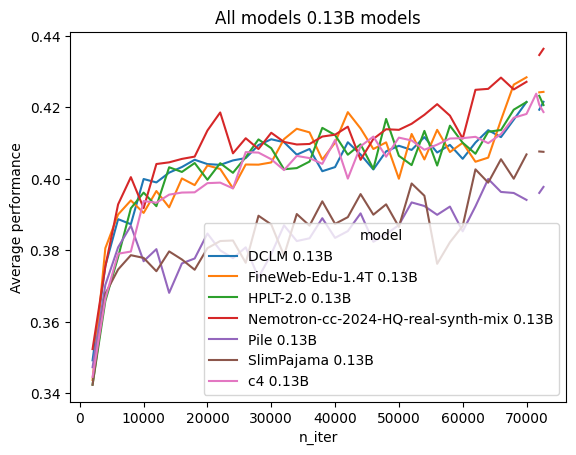

In [13]:
df_plot = df_all.copy()
df_plot["model"] = df_plot.apply(lambda row: f'{row["data"]} {row["size"]}B', axis=1)
df_plot.loc[(df_plot.benchmark.isin(bench_sel_curve)) & (df_plot.loc[:, "size"] == 0.13)].pivot_table(index="n_iter", columns="model", values="value").plot(legend=True)
plt.title("All models 0.13B models")
plt.ylabel("Average performance")

## Hyperparameter analysis

In [14]:
hp_cols = [
 'size',
 'data',
 'tokenizer',
 'n_tokens',
 'global_bs',
 'context',
 'schedule',
 'lr',
 'warmup']

In [15]:
df_all.drop_duplicates(hp_cols).loc[:, hp_cols].sort_values(by=["size", "data"]).reset_index(drop=True)

,size,data,tokenizer,n_tokens,global_bs,context,schedule,lr,warmup
0,0.13,DCLM,GPT-NeoX-2,300,1008,4096,WSD_lr,0.006,25000
1,0.13,DCLM,GPT-NeoX,300,1008,4096,WSD_lr,0.004,25000
2,0.13,FineWeb-Edu-1.4T,GPT-NeoX,300,1008,4096,WSD_lr,0.004,25000
3,0.13,HPLT-2.0,GPT-NeoX,300,1008,4096,WSD_lr,0.004,25000
4,0.13,Nemotron-cc-2024-HQ-real-synth-mix,GPT-NeoX,300,1008,4096,WSD_lr,0.004,25000
5,0.13,Pile,GPT-NeoX,300,1008,4096,WSD_lr,0.004,25000
6,0.13,SlimPajama,GPT-NeoX,300,1008,4096,WSD_lr,0.004,25000
7,0.13,c4,GPT-NeoX,300,1024,4096,WSD_lr,0.004,25000
8,0.13,c4,GPT-NeoX-2,300,1008,4096,WSD_lr,0.006,25000
9,0.40,DCLM,GPT-NeoX-2,300,1000,4096,WSD_lr,0.004,25000


In [26]:
df_all.loc[:, hp_cols].groupby(hp_cols).count()

Empty DataFrame
Columns: []
Index: [(0.13, DCLM, GPT-NeoX, 300, 1008, 4096, WSD_lr, 0.004, 25000), (0.13, DCLM, GPT-NeoX-2, 300, 1008, 4096, WSD_lr, 0.006, 25000), (0.13, FineWeb-Edu-1.4T, GPT-NeoX, 300, 1008, 4096, WSD_lr, 0.004, 25000), (0.13, HPLT-2.0, GPT-NeoX, 300, 1008, 4096, WSD_lr, 0.004, 25000), (0.13, Nemotron-cc-2024-HQ-real-synth-mix, GPT-NeoX, 300, 1008, 4096, WSD_lr, 0.004, 25000), (0.13, Pile, GPT-NeoX, 300, 1008, 4096, WSD_lr, 0.004, 25000), (0.13, SlimPajama, GPT-NeoX, 300, 1008, 4096, WSD_lr, 0.004, 25000), (0.13, c4, GPT-NeoX, 300, 1024, 4096, WSD_lr, 0.004, 25000), (0.13, c4, GPT-NeoX-2, 300, 1008, 4096, WSD_lr, 0.006, 25000), (0.4, DCLM, GPT-NeoX-2, 300, 1000, 4096, WSD_lr, 0.004, 25000), (0.4, FineWeb-Edu-1.4T, GPT-NeoX, 300, 1000, 4096, WSD_lr, 0.004, 25000), (0.4, HPLT-2.0, GPT-NeoX, 300, 1000, 4096, WSD_lr, 0.004, 25000), (1.7, C4, GPT-NeoX, 50, 1296, 2048, WSD_lr, 0.002, 10000), (1.7, C4, GPT-NeoX, 50, 1296, 2048, WSD_lr, 0.003, 10000), (1.7, C4, GPT-NeoX, 50, 1296, 2048, WSD_lr, 0.004, 10000), (1.7, C4, GPT-NeoX, 50, 2048, 2048, WSD_lr, 0.004, 1000), (1.7, C4, GPT-NeoX, 50, 2048, 2048, WSD_lr, 0.005, 1500), (1.7, C4, GPT-NeoX, 50, 2048, 2048, WSD_lr, 0.005, 2000), (1.7, C4, GPT-NeoX, 50, 2048, 2048, WSD_lr, 0.006, 2000), (1.7, C4, GPT-NeoX, 50, 2048, 2048, cosine_lr, 0.005, 1500), (1.7, C4, GPT-NeoX, 300, 1008, 4096, WSD_lr, 0.004, 10000), (1.7, C4, GPT-NeoX, 300, 1008, 4096, WSD_lr, 0.004, 20000), (1.7, C4, GPT-NeoX, 300, 1008, 4096, WSD_lr, 0.004, 25000), (1.7, C4, GPT-NeoX, 300, 2048, 2048, WSD_lr, 0.004, 20000), (1.7, C4, GPT-NeoX, 300, 2048, 2048, WSD_lr, 0.004, 25000), (1.7, C4, GPT-NeoX, 300, 2048, 2048, WSD_lr, 0.004, 30000), (1.7, C4, GPT-NeoX, 300, 2048, 2048, WSD_lr, 0.005, 30000), (1.7, CommonCorpus, GPT-NeoX, 300, 1008, 4096, WSD_lr, 0.004, 25000), (1.7, DCLM, GPT-NeoX, 300, 1008, 4096, WSD_lr, 0.004, 25000), (1.7, DCLM, GPT-NeoX, 1000, 1008, 4096, WSD_lr, 0.004, 25000), (1.7, FineWeb-Edu-1.4T, GPT-NeoX, 300, 1008, 4096, WSD_lr, 0.004, 25000), (1.7, FineWeb-Edu-1.4T, GPT-NeoX, 1000, 1008, 4096, WSD_lr, 0.004, 25000), (1.7, HPLT-2.0, GPT-NeoX, 300, 1008, 4096, WSD_lr, 0.004, 25000), (1.7, Nemotron-cc-2024-HQ-real-synth-mix, GPT-NeoX, 300, 1008, 4096, WSD_lr, 0.004, 25000), (1.7, Nemotron-cc-2024-HQ-real-synth-mix, GPT-NeoX, 1000, 1008, 4096, WSD_lr, 0.004, 25000), (1.7, Pile, GPT-NeoX, 300, 1008, 4096, WSD_lr, 0.004, 25000), (1.7, SlimPajama, GPT-NeoX, 300, 1008, 4096, WSD_lr, 0.004, 25000)]

## Plot for different datasets

In [27]:
df_all["size"].value_counts()

size
1.70    12378
0.13     5766
0.40     1090
Name: count, dtype: int64

In [28]:
config = {
    #"size": 1.7,
    "tokenizer": "GPT-NeoX",
    "n_tokens": 300,
    "global_bs": 1008,
    "context": 4096,
    "schedule": "WSD_lr",
    "warmup": 25000,
}
mask = None
for key, value in config.items():
    if mask is None:
        mask = (df_all.loc[:, key] == value)
    else:
        mask &= (df_all.loc[:, key] == value)
df_all[mask].loc[:, hp_cols].groupby(hp_cols).count()

Empty DataFrame
Columns: []
Index: [(0.13, DCLM, GPT-NeoX, 300, 1008, 4096, WSD_lr, 0.004, 25000), (0.13, FineWeb-Edu-1.4T, GPT-NeoX, 300, 1008, 4096, WSD_lr, 0.004, 25000), (0.13, HPLT-2.0, GPT-NeoX, 300, 1008, 4096, WSD_lr, 0.004, 25000), (0.13, Nemotron-cc-2024-HQ-real-synth-mix, GPT-NeoX, 300, 1008, 4096, WSD_lr, 0.004, 25000), (0.13, Pile, GPT-NeoX, 300, 1008, 4096, WSD_lr, 0.004, 25000), (0.13, SlimPajama, GPT-NeoX, 300, 1008, 4096, WSD_lr, 0.004, 25000), (1.7, C4, GPT-NeoX, 300, 1008, 4096, WSD_lr, 0.004, 25000), (1.7, CommonCorpus, GPT-NeoX, 300, 1008, 4096, WSD_lr, 0.004, 25000), (1.7, DCLM, GPT-NeoX, 300, 1008, 4096, WSD_lr, 0.004, 25000), (1.7, FineWeb-Edu-1.4T, GPT-NeoX, 300, 1008, 4096, WSD_lr, 0.004, 25000), (1.7, HPLT-2.0, GPT-NeoX, 300, 1008, 4096, WSD_lr, 0.004, 25000), (1.7, Nemotron-cc-2024-HQ-real-synth-mix, GPT-NeoX, 300, 1008, 4096, WSD_lr, 0.004, 25000), (1.7, Pile, GPT-NeoX, 300, 1008, 4096, WSD_lr, 0.004, 25000), (1.7, SlimPajama, GPT-NeoX, 300, 1008, 4096, WSD_lr, 0.004, 25000)]

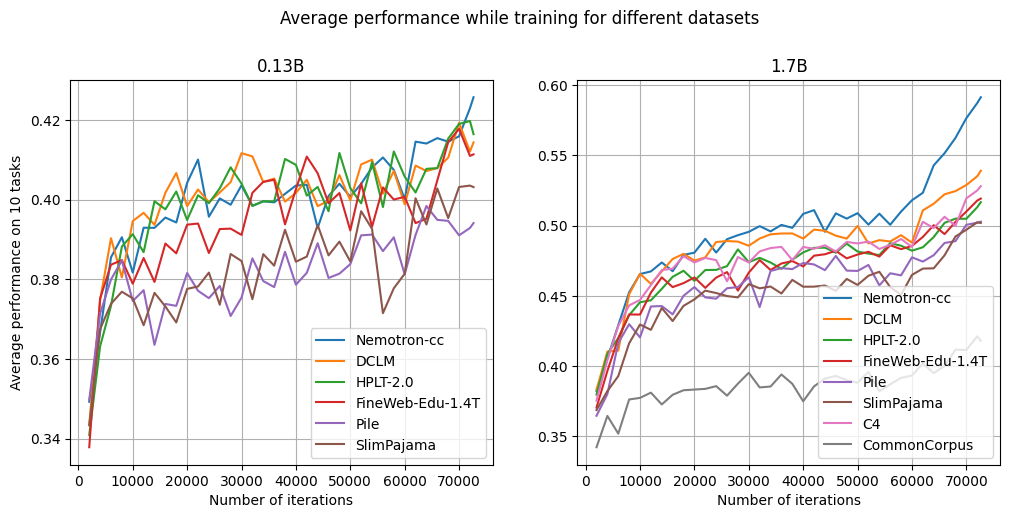

In [29]:
# compute average per iterationdf_sub.loc[:, ["size", "benchmark", "value"]] ".groupby("n_iter").mean()
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sizes = [0.13, 1.7]
df_plot = df_all.copy()
df_plot.data = df_plot.data.apply(lambda s: s.replace('Nemotron-cc-2024-HQ-real-synth-mix', 'Nemotron-cc'))
for i, (ax, size) in enumerate(zip(axes, sizes)):        
    df_sub = df_plot.loc[(mask) & (df_plot.loc[:, "size"] == size)].copy()
    df_sub["tokens"] = df_plot["n_iter"] * df_plot["global_bs"]
    df_iter = df_sub.pivot_table(index=["data", "n_iter"], columns="benchmark", values="value").loc[:, bench_sel].mean(axis=1)

    df_iter_pivot = df_iter.reset_index().pivot_table(index="n_iter", columns="data", values=0)
    dataset_order = [
        "Nemotron-cc",
        "DCLM",
        "HPLT-2.0",
        "FineWeb-Edu-1.4T",
        "Pile",
        "SlimPajama",
        "C4",
        "CommonCorpus",        
    ]
    # fix order to have same colors across plots
    df_iter_pivot = df_iter_pivot.loc[:, [x for x in dataset_order if x in df_iter_pivot.columns]]    
    df_iter_pivot.plot(
        ax=ax,
    )
    ax.grid()
    ax.set_title(f"{size}B");
    ax.set_xlabel("Number of iterations");
    if i == 0:
        ax.set_ylabel(f"Average performance on {len(bench_sel)} tasks");
    ax.legend(
        #loc="lower center",
        #loc="upper left",
        loc="lower right",
        ncols=1,
    )
fig.suptitle("Average performance while training for different datasets", y=1.02);

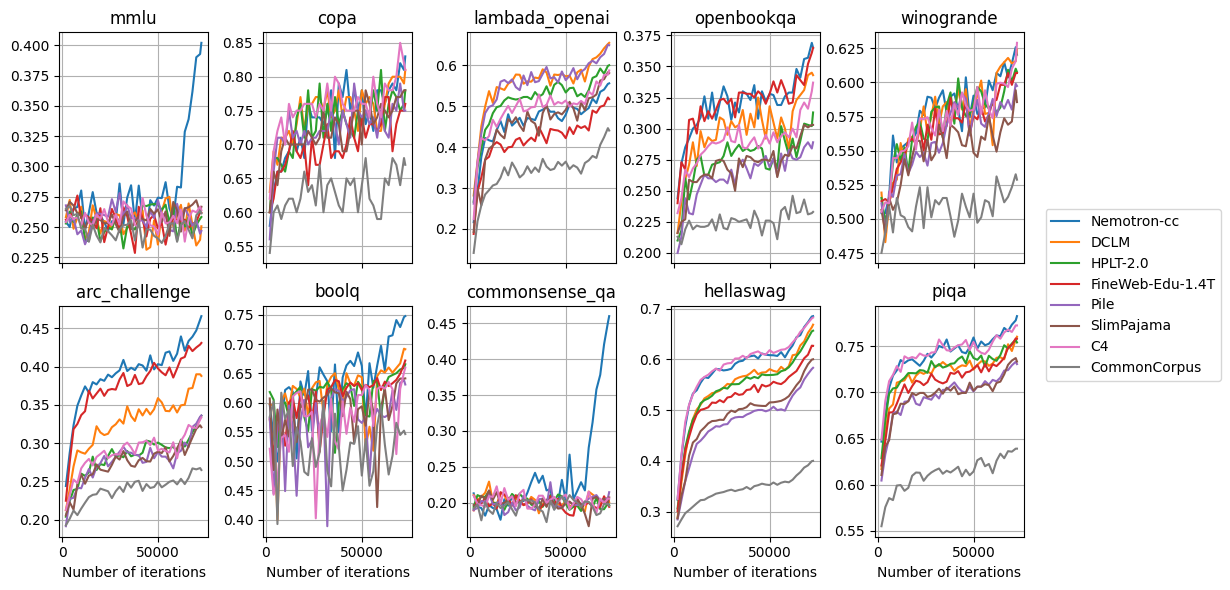

In [30]:
import numpy as np
fig, axes = plt.subplots(2, 5, figsize=(12, 6), sharex=True, sharey=False)

axes = np.ravel(axes)
lines = []  # Store line objects for legend
labels = []  # Store labels for legend
df_plot = df_all.copy()
df_plot.data = df_plot.data.apply(lambda s: s.replace('Nemotron-cc-2024-HQ-real-synth-mix', 'Nemotron-cc'))

for i, benchmark in enumerate(bench_sel):
    ax = axes[i]
    # Create an explicit copy of the filtered DataFrame
    df_sub = df_plot.loc[(mask) & (df_plot.loc[:, "size"] == size) & (df_plot.benchmark == benchmark)].copy()
    # Now modify the copy
    df_sub["tokens"] = df_sub["n_iter"] * df_sub["global_bs"]
    
    df_iter = df_sub.pivot_table(index=["data", "n_iter"], columns="benchmark", values="value").loc[:, benchmark]
    df_iter = df_iter.reset_index().pivot_table(index="n_iter", columns="data", values=benchmark).loc[:, dataset_order]
    # Capture the line objects and data column names
    plot_result = df_iter.plot(ax=ax, legend=False)
    
    # Store the lines and labels from the first plot
    if i == 0:
        lines = plot_result.get_lines()
        labels = df_iter.columns.tolist()
    
    ax.grid()
    ax.set_title(f"{benchmark}")
    ax.set_xlabel("Number of iterations")

# Create a single legend outside the plot
fig.legend(lines, labels, loc='center right', bbox_to_anchor=(1.02, 0.5))

# Adjust layout to make room for the legend
plt.tight_layout()
plt.subplots_adjust(right=0.85)

## Plot for different scales

In [31]:
df_all.loc[df_all.data == "DCLM", hp_cols].groupby(hp_cols).count()

Empty DataFrame
Columns: []
Index: [(0.13, DCLM, GPT-NeoX, 300, 1008, 4096, WSD_lr, 0.004, 25000), (0.13, DCLM, GPT-NeoX-2, 300, 1008, 4096, WSD_lr, 0.006, 25000), (0.4, DCLM, GPT-NeoX-2, 300, 1000, 4096, WSD_lr, 0.004, 25000), (1.7, DCLM, GPT-NeoX, 300, 1008, 4096, WSD_lr, 0.004, 25000), (1.7, DCLM, GPT-NeoX, 1000, 1008, 4096, WSD_lr, 0.004, 25000)]

In [32]:
config = {    
    "data": "DCLM",
    #"tokenizer": "GPT-NeoX",
    "lr": .004,
    "n_tokens": 300,
}
mask_scaling = None
for key, value in config.items():
    if mask_scaling is None:
        mask_scaling = (df_all.loc[:, key] == value)
    else:
        mask_scaling &= (df_all.loc[:, key] == value)
df_all[mask_scaling].loc[:, hp_cols].groupby(hp_cols).count()

,,,,,,,,
size,data,tokenizer,n_tokens,global_bs,context,schedule,lr,warmup
0.13,DCLM,GPT-NeoX,300,1008,4096,WSD_lr,0.004,25000
0.40,DCLM,GPT-NeoX-2,300,1000,4096,WSD_lr,0.004,25000
1.70,DCLM,GPT-NeoX,300,1008,4096,WSD_lr,0.004,25000


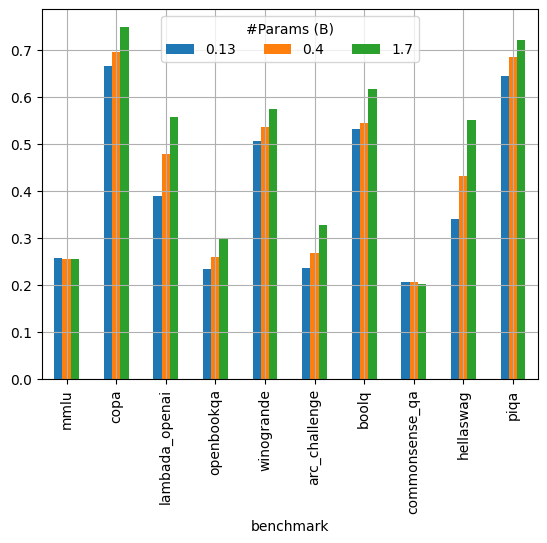

In [33]:
ax = df_all[mask_scaling].pivot_table(
    index="size", columns="benchmark", values="value"
).loc[:, bench_sel].T.plot(kind="bar")
ax.legend(title="#Params (B)", ncol=3)
ax.grid()
plt.xticks(rotation=90);

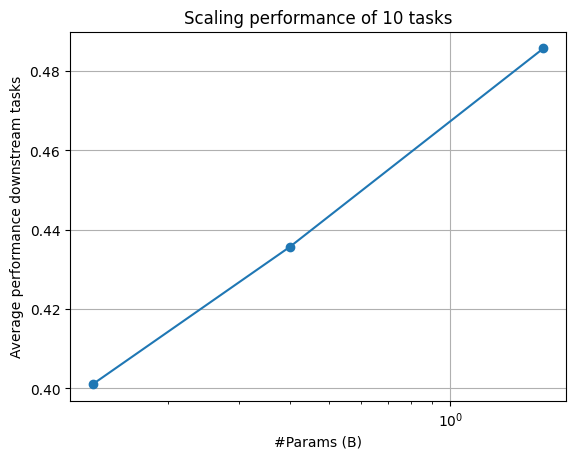

In [34]:
# TODO pull results of baselines Smolm2, etc
ax = df_all[mask_scaling].pivot_table(
    index="size", columns="benchmark", values="value"
).loc[:, bench_sel].mean(axis=1).plot(marker="o")
ax.grid()
ax.set_xscale("log")
ax.set_xlabel("#Params (B)")
ax.set_ylabel("Average performance downstream tasks")
ax.set_title(
    f"Scaling performance of {len(bench_sel)} tasks"
);


In [25]:
# TODO store data of baselines